In [1]:
import warnings
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from pmdarima import auto_arima
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA


In [2]:
df = pd.read_csv('/Users/Daniyar/Mountains/Data/df_final.csv', parse_dates=['time'], index_col="time")

In [3]:
df.head()

,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,generation other,...,rain_1h_Valencia,rain_3h_Valencia,snow_3h_Valencia,clouds_all_Valencia,weather_broken clouds_Valencia,weather_few clouds_Valencia,weather_light rain_Valencia,weather_others_Valencia,weather_scattered clouds_Valencia,weather_sky is clear_Valencia
time,,,,,,,,,,,,,,,,,,,,,
2014-12-31 23:00:00+00:00,447.0,329.0,4844.0,4821.0,162.0,863.0,1051.0,1899.0,7096.0,43.0,...,0.0,0.0,0.0,0.0,0,0,0,0,0,1
2015-01-01 00:00:00+00:00,449.0,328.0,5196.0,4755.0,158.0,920.0,1009.0,1658.0,7096.0,43.0,...,0.0,0.0,0.0,0.0,0,0,0,0,0,1
2015-01-01 01:00:00+00:00,448.0,323.0,4857.0,4581.0,157.0,1164.0,973.0,1371.0,7099.0,43.0,...,0.0,0.0,0.0,0.0,0,0,0,0,0,1
2015-01-01 02:00:00+00:00,438.0,254.0,4314.0,4131.0,160.0,1503.0,949.0,779.0,7098.0,43.0,...,0.0,0.0,0.0,0.0,0,0,0,0,0,1
2015-01-01 03:00:00+00:00,428.0,187.0,4130.0,3840.0,156.0,1826.0,953.0,720.0,7097.0,43.0,...,0.0,0.0,0.0,0.0,0,0,0,0,0,1


In [4]:
# Define features and target
X = df.drop(columns=['generation solar','generation wind onshore'])
y_solar = df['generation solar']
y_wind = df['generation wind onshore']

In [5]:
y_solar

time
2014-12-31 23:00:00+00:00    49.0
2015-01-01 00:00:00+00:00    50.0
2015-01-01 01:00:00+00:00    50.0
2015-01-01 02:00:00+00:00    50.0
2015-01-01 03:00:00+00:00    42.0
                             ... 
2018-12-31 18:00:00+00:00    85.0
2018-12-31 19:00:00+00:00    33.0
2018-12-31 20:00:00+00:00    31.0
2018-12-31 21:00:00+00:00    31.0
2018-12-31 22:00:00+00:00    31.0
Name: generation solar, Length: 35064, dtype: float64

In [6]:
def split_by_date(X,train_end_date):
    if not isinstance(train_end_date, pd.Timestamp):
        train_end_date = pd.Timestamp(train_end_date)

    # Convert index of X and y to Timestamp objects if they are strings
    if isinstance(X.index[0], str):
        X.index = pd.to_datetime(X.index)
        
    X_train = X[X.index <= train_end_date]
    X_test = X[X.index > train_end_date]
    
    return X_train, X_test

train_end_date = pd.to_datetime('2017-12-31 23:00:00+00:00')
X_train, X_test = split_by_date(X,train_end_date)

In [7]:
y_solar_train, y_solar_test = split_by_date(y_solar, train_end_date)

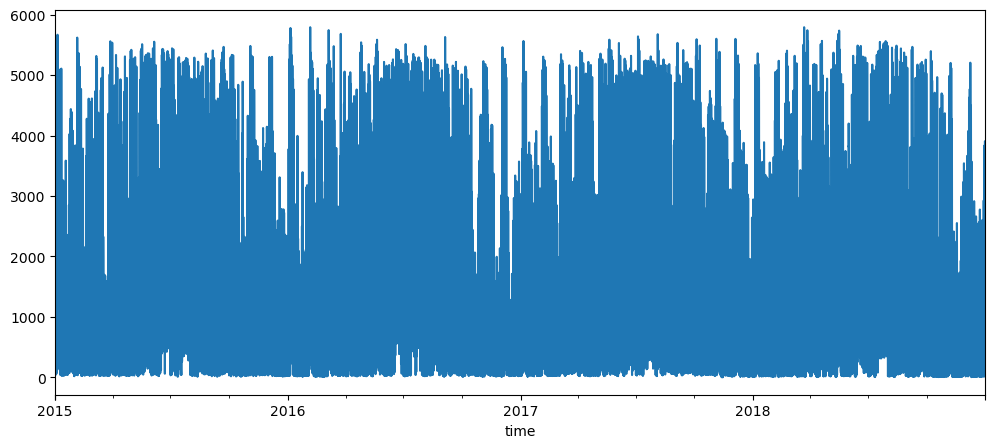

In [8]:
y_solar.plot(figsize=(12, 5))
plt.show()